In [1]:
import tensorflow as tf
import PIL 
from PIL import Image
import scipy.io as sio
import glob 
import argparse

import numpy as np
# from numpy import matlib
import math
import timeit

# %load_ext autoreload
# %autoreload 2

In [2]:
DATA = 1
from model_train import * 
X_train, Y_train = load_data(DATA,10)

In [3]:
tf.reset_default_graph()
if DATA == 0:
    X = tf.placeholder(tf.float32, [None, 480, 640, 3])
    Y = tf.placeholder(tf.float32, [None, 480, 640, 1])
elif DATA == 1:
    X = tf.placeholder(tf.float32, [None, 245, 437, 3])
#     Y_ = tf.placeholder(tf.float32, [None, 245, 437, 3])
    Y = tf.placeholder(tf.float32, [None, 245, 437, 1])
is_training = tf.placeholder(tf.bool)
with tf.variable_scope('Encoder') as enc: 
    latent_y = encoder(X, is_training, DATA)
with tf.variable_scope('Decoder') as dec:
    output = decoder(latent_y, is_training, DATA)
# with tf.variable_scope(enc, reuse=True): 
#     latent_x = encoder(X, is_training, DATA)

trans_loss = tf.nn.l2_loss(output-Y)
# feat_loss = tf.nn.l2_loss(latent_x-latent_y)
# total_loss = trans_loss + feat_loss*0.001    

mean_loss = tf.reduce_mean(trans_loss)
enc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope='Encoder')
dec_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope='Decoder')

In [4]:

sess = tf.Session(config=tf.ConfigProto(device_count = {'GPU': 0}))
enc_saver = tf.train.Saver(var_list=enc_vars)
dec_saver = tf.train.Saver(var_list=dec_vars)
# writer = tf.summary.FileWriter('./tb',sess.graph)
sess.run(tf.global_variables_initializer())
if DATA == 1:
    enc_saver.restore(sess, './final_Model/f_data_1_epochs_21_batchsize_5_rate_1e-05_enc')
    dec_saver.restore(sess, './final_Model/f_data_1_epochs_21_batchsize_5_rate_1e-05_dec')
if DATA == 0:
    saver.restore(sess, './Models/PT_data_0_epochs_20_batchsize_5_rate_0.01_decay_1.0')

INFO:tensorflow:Restoring parameters from ./final_Model/f_data_1_epochs_21_batchsize_5_rate_1e-05_enc
INFO:tensorflow:Restoring parameters from ./final_Model/f_data_1_epochs_21_batchsize_5_rate_1e-05_dec


102.511


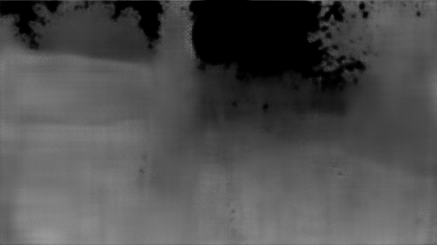

In [6]:
i = 1
IMG , img_loss = sess.run([output, trans_loss], {X: X_train[i:i+1,...],
                        Y: Y_train[i:i+1,...],
                        is_training: False})

print(img_loss)
Image.fromarray(np.uint8(np.squeeze(IMG*255.0)))

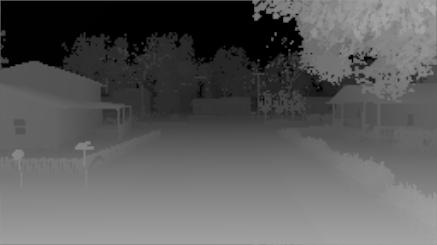

In [34]:
Image.fromarray(np.uint8(np.squeeze(Y_train[i,:,:,:]*255.0)))

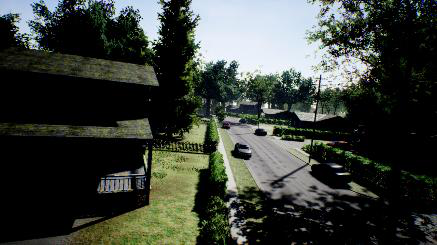

In [41]:
Image.fromarray(np.uint8(np.squeeze(X_train[i,:,:,:]*255.0)))

In [19]:
np.amax(IMG)

0.28083199